In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm






In [145]:
url='https://raw.githubusercontent.com/kintis/HomeWork/main/Life%20Expectancy%20Data.csv'
df=pd.read_csv(url)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.280,65.0,1154,...,6.0,8.16,65.0,0.1,584.259,3.374e+07,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.524,62.0,492,...,58.0,8.18,62.0,0.1,612.697,3.276e+05,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219,64.0,430,...,62.0,8.13,64.0,0.1,631.745,3.173e+07,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184,67.0,2787,...,67.0,8.52,67.0,0.1,669.959,3.697e+06,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097,68.0,3013,...,68.0,7.87,68.0,0.1,63.537,2.979e+06,18.2,18.2,0.454,9.5


Status: Developed or Developing status<br>
Life expectancy: Life Expectancy in age<br>
Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)<br>
infant deaths: Number of Infant Deaths per 1000 population<br>
Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)<br>
percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)<br>
Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)<br>
Measles: Measles - number of reported cases per 1000 population<br>
BMI: Average Body Mass Index of entire population<br>
under-five deaths: Number of under-five deaths per 1000 population<br>
Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)<br>
Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)<br>
Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)<br>
HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)<br>
GDP: Gross Domestic Product per capita (in USD)<br>
Population: Population of the country<br>
thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )<br>
thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)<br>
Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)<br>


In [146]:
df.shape

(2938, 22)

In [147]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [148]:
# Rename the columns
data = df.rename(columns={'Country': 'country', 'Year': 'year', 'Status': 'status', 'Life expectancy ': 'life_expectancy', 
       'Adult Mortality': 'adult_mortality', 'infant deaths':'infant_death', 'Alcohol':'alcohol', 'percentage expenditure': 'percentage_expenditure',
       'Hepatitis B':'hepatitis_b', 'Measles ':'measles', ' BMI ':'bmi', 'under-five deaths ':'under_five_deaths',
       'Polio':'polio', 'Total expenditure': 'total_expenditure','Diphtheria ':'diphtheria', ' HIV/AIDS':'hiv_Aids',
       'GDP':'gdp', 'Population':'population', ' thinness  1-19 years':'thinness_10_to_19', ' thinness 5-9 years':'thinness_5_to_9',
       'Income composition of resources':'income_composition_of_resources', 'Schooling': 'schooling'})



In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_death                     2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  polio               

In [ ]:
country=data['country']
country

In [ ]:
status=data['status']
status

In [152]:
pd.set_option('display.precision', 3)
data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
year,2938.0,2.008e+03,4.614e+00,2000.000,2004.000,2.008e+03,2.012e+03,2.015e+03
life_expectancy,2928.0,6.922e+01,9.524e+00,36.300,63.100,7.210e+01,7.570e+01,8.900e+01
adult_mortality,2928.0,1.648e+02,1.243e+02,1.000,74.000,1.440e+02,2.280e+02,7.230e+02
infant_death,2938.0,3.030e+01,1.179e+02,0.000,0.000,3.000e+00,2.200e+01,1.800e+03
alcohol,2744.0,4.603e+00,4.052e+00,0.010,0.877,3.755e+00,7.703e+00,1.787e+01
percentage_expenditure,2938.0,7.383e+02,1.988e+03,0.000,4.685,6.491e+01,4.415e+02,1.948e+04
hepatitis_b,2385.0,8.094e+01,2.507e+01,1.000,77.000,9.200e+01,9.700e+01,9.900e+01
measles,2938.0,2.420e+03,1.147e+04,0.000,0.000,1.700e+01,3.602e+02,2.122e+05
bmi,2904.0,3.832e+01,2.004e+01,1.000,19.300,4.350e+01,5.620e+01,8.730e+01
under_five_deaths,2938.0,4.204e+01,1.604e+02,0.000,0.000,4.000e+00,2.800e+01,2.500e+03


In [153]:
data.describe(include='object').transpose()

,count,unique,top,freq
country,2938,193,Afghanistan,16
status,2938,2,Developing,2426


In [ ]:
data['country'].unique()


In [155]:
# Number of unique classes in each object column
data.select_dtypes(include=[object]).apply(pd.Series.nunique, axis = 0)

country    193
status       2
dtype: int64

In [157]:
# Function to calculate missing values by column# 
def missing_values_table(data):
        # Total missing values
        mis_val = data.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [159]:
missing_values = missing_values_table(data)
missing_values

Your selected dataframe has 22 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
population,652,22.2
hepatitis_b,553,18.8
gdp,448,15.2
total_expenditure,226,7.7
alcohol,194,6.6
income_composition_of_resources,167,5.7
schooling,163,5.5
bmi,34,1.2
thinness_10_to_19,34,1.2
thinness_5_to_9,34,1.2


In [160]:
#Histogram
data_numeric = data.select_dtypes(include='number')
column_numeric = data_numeric.columns.drop('year')
#data_numeric.head()

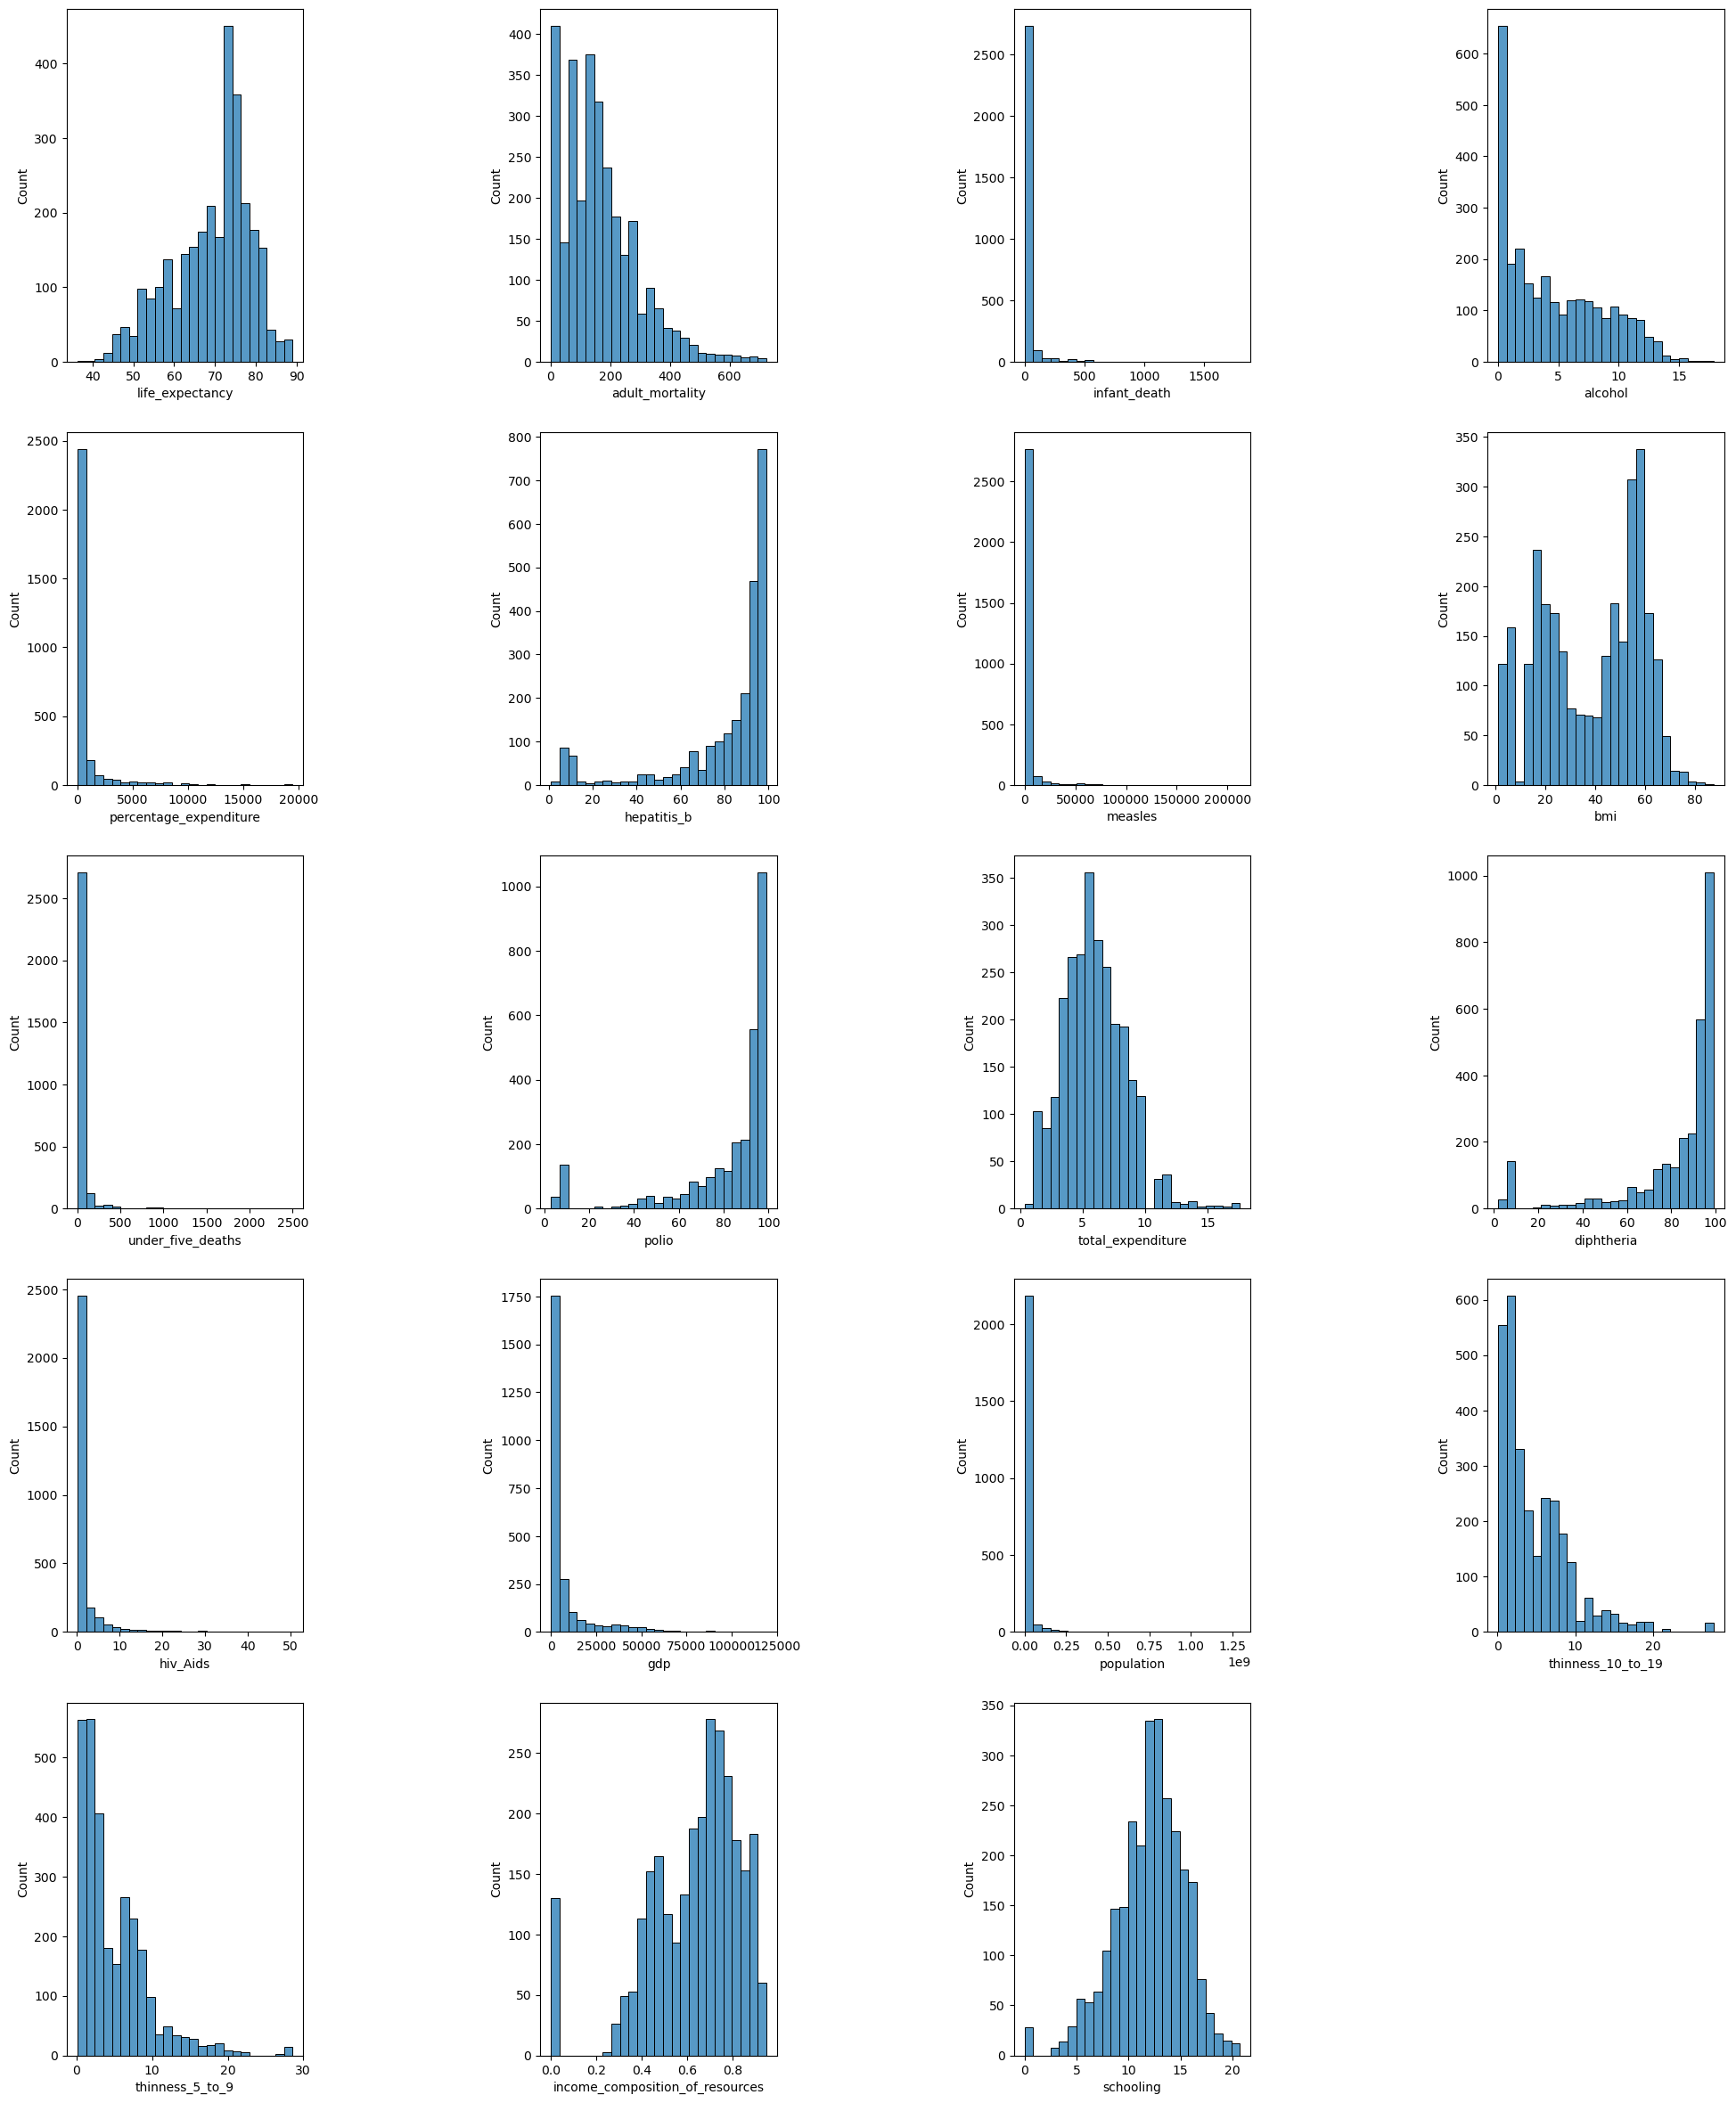

In [163]:
plt.figure(figsize=(24,36))
plt.subplots_adjust(wspace=1, hspace=None)

i = 1
for col_name in column_numeric:
    plt.subplot(6,4,i)
    sns.histplot(data = data_numeric[col_name],  bins = 25)
    i +=1

To note: The dataset is skewed, has many outliers.

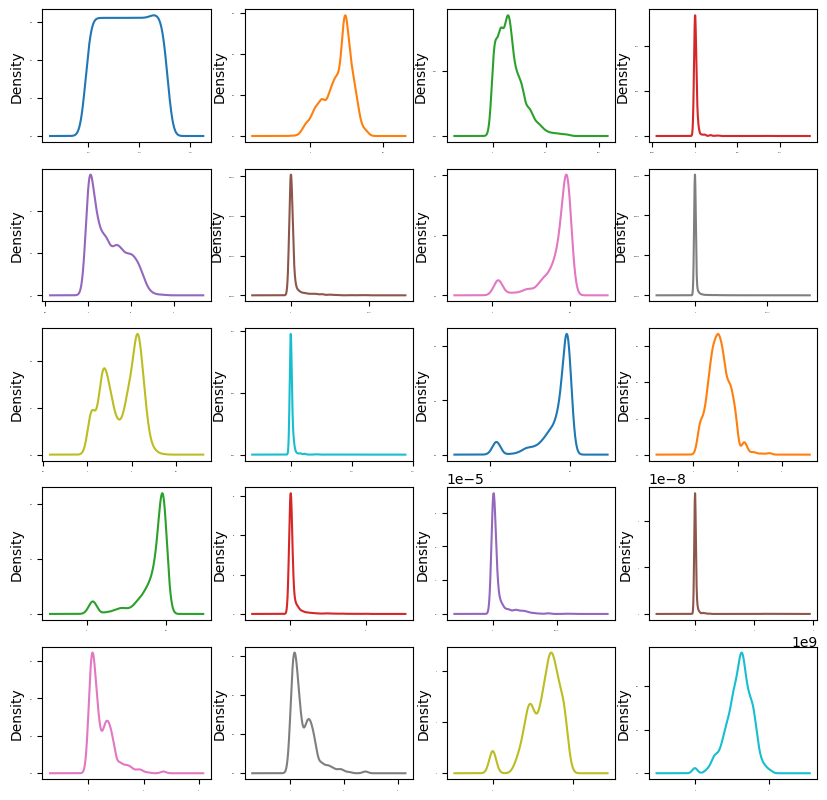

In [164]:
# визуализация распределение плотности
data_numeric.plot(kind='density', subplots=True, layout=(5,4), figsize=(10, 10), sharex=False, legend=False, fontsize=1)
plt.show()

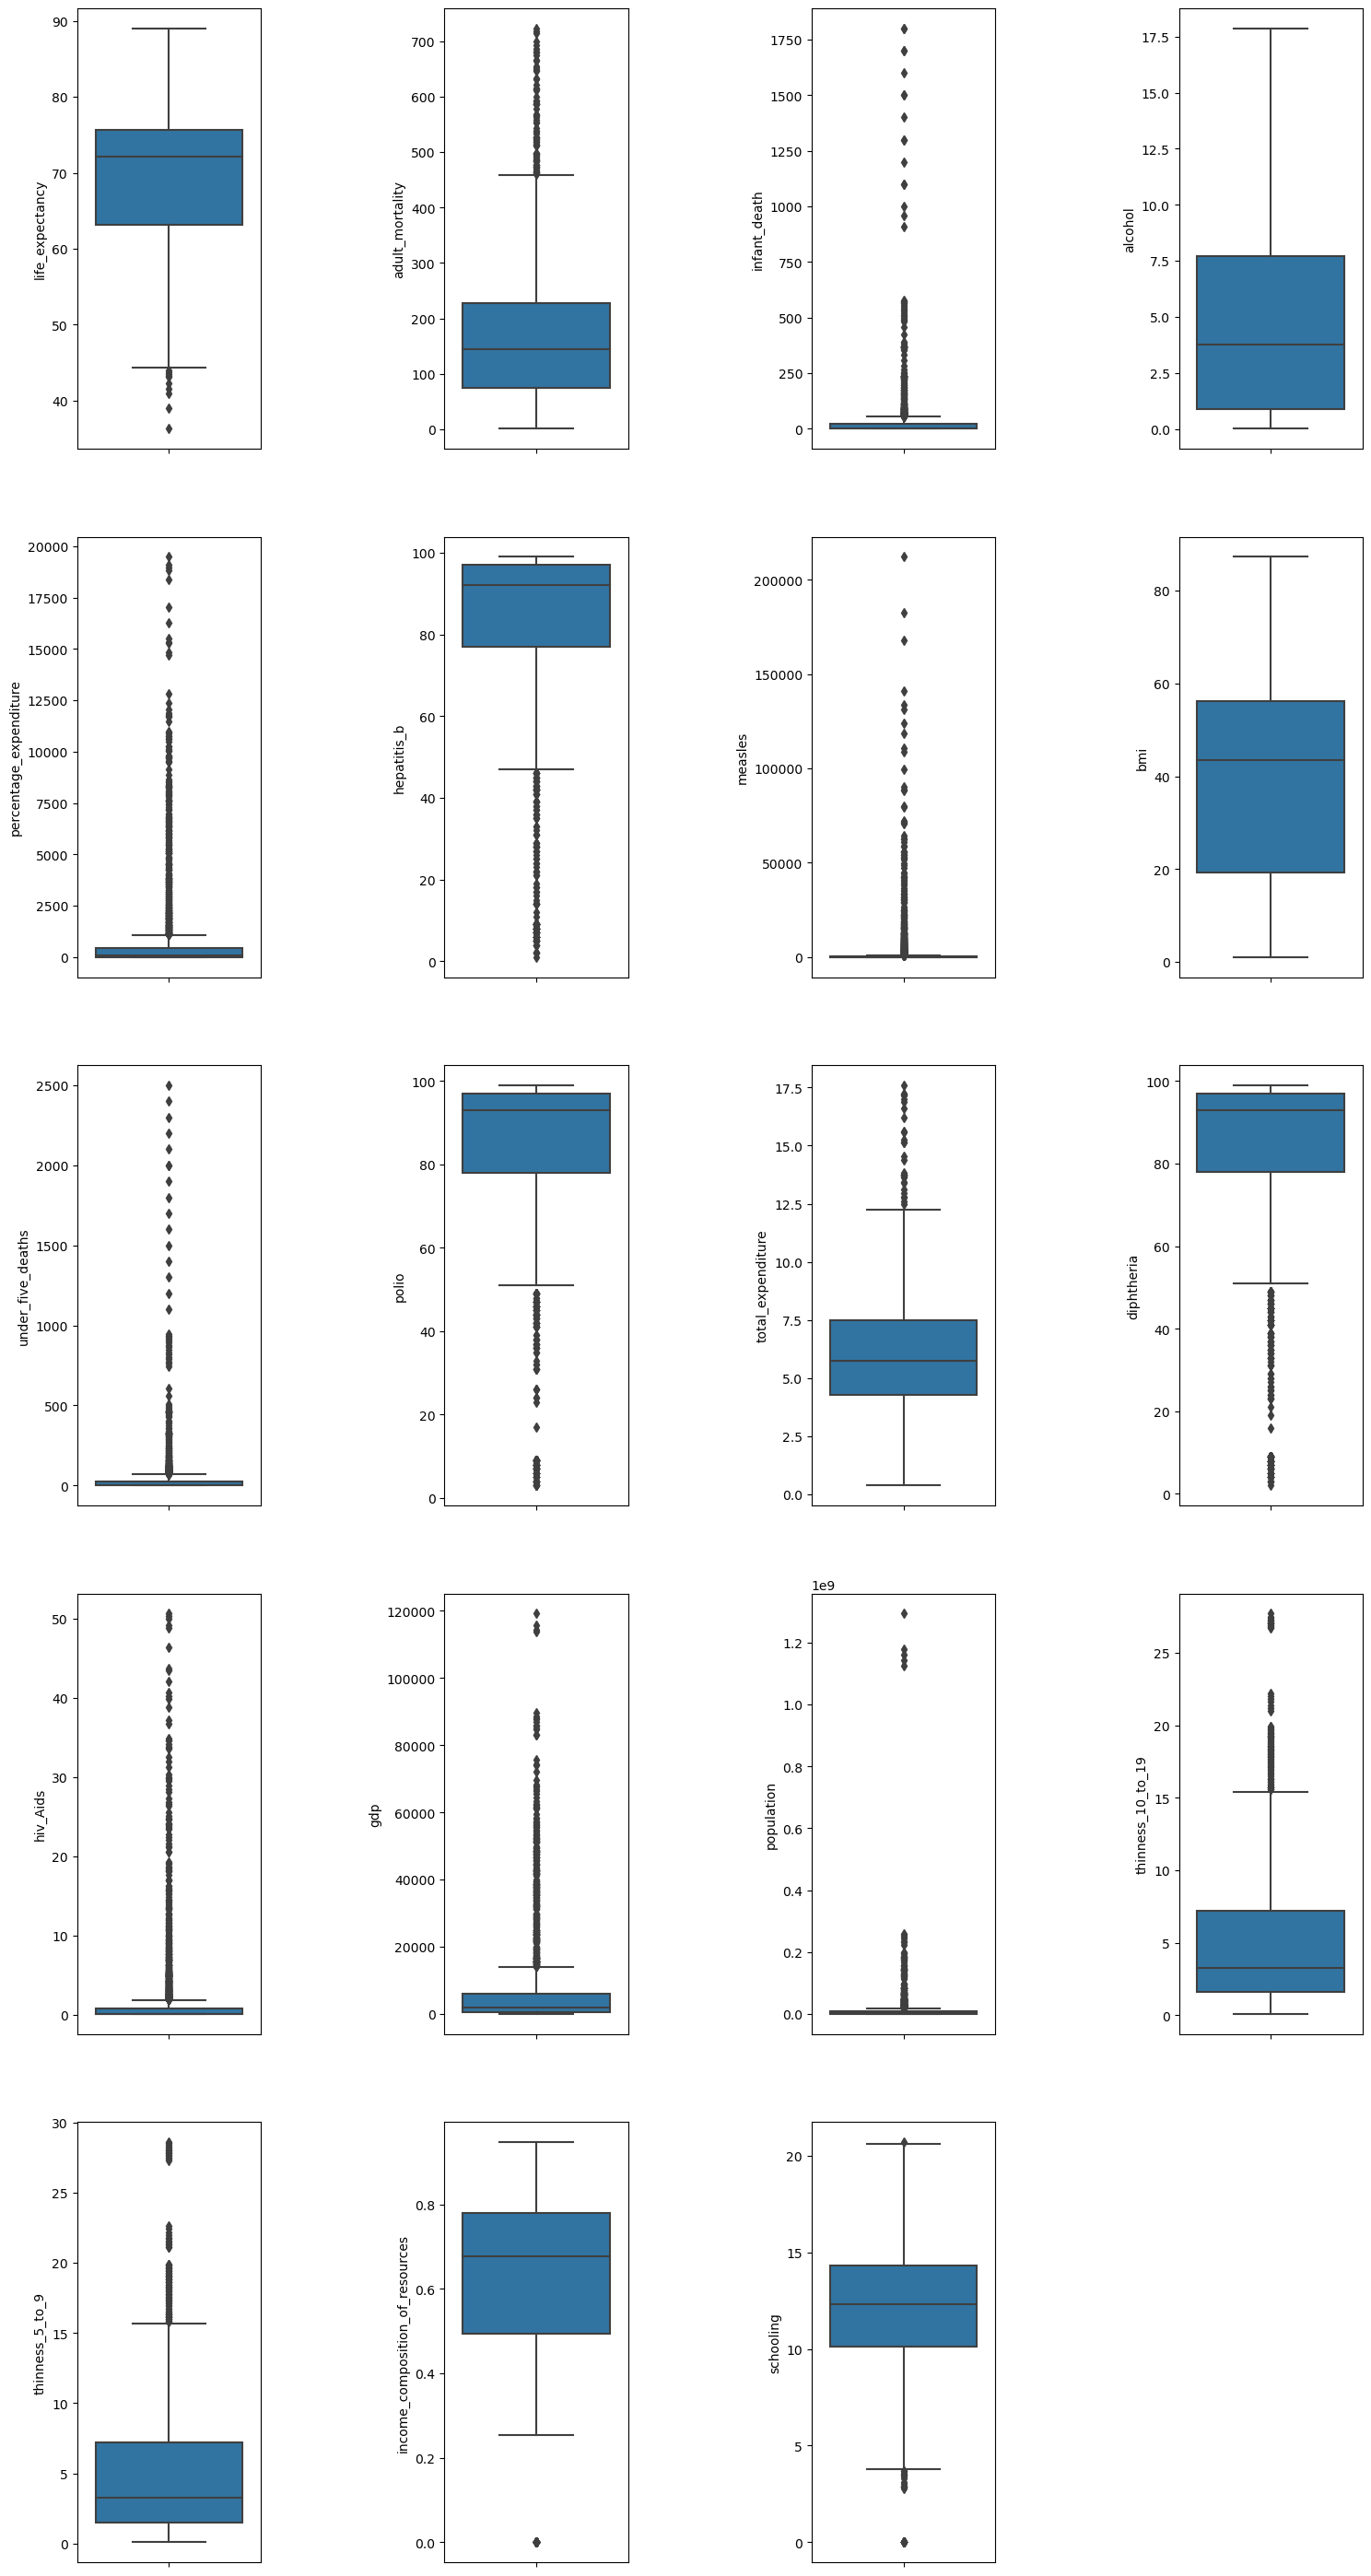

In [165]:
# Box Plots
plt.figure(figsize=(18,36))
plt.subplots_adjust(wspace=1, hspace=None)

i = 1
for col_name in column_numeric:
    plt.subplot(5,4,i)
    sns.boxplot(data=data_numeric, y=col_name)
    i +=1


To Note: Large number of outliers.


In [166]:
corr_data=data_numeric.corr()['life_expectancy'].sort_values()
corr_data

adult_mortality                   -0.696
hiv_Aids                          -0.557
thinness_10_to_19                 -0.477
thinness_5_to_9                   -0.472
under_five_deaths                 -0.223
infant_death                      -0.197
measles                           -0.158
population                        -0.022
year                               0.170
total_expenditure                  0.218
hepatitis_b                        0.257
percentage_expenditure             0.382
alcohol                            0.405
gdp                                0.461
polio                              0.466
diphtheria                         0.479
bmi                                0.568
income_composition_of_resources    0.725
schooling                          0.752
life_expectancy                    1.000
Name: life_expectancy, dtype: float64

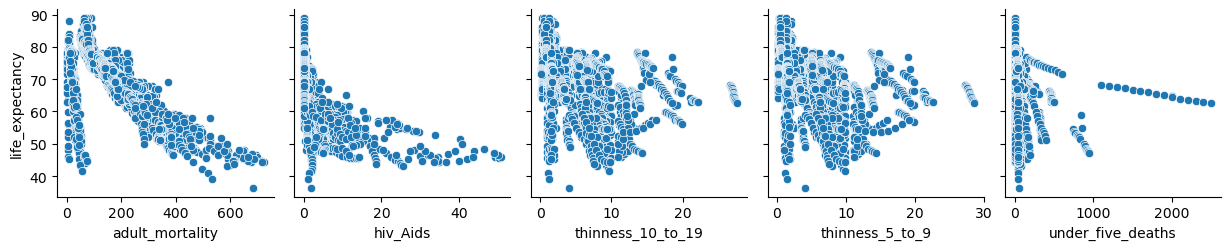

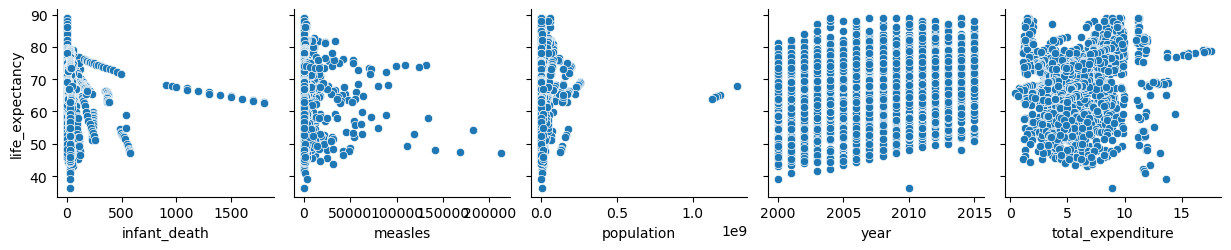

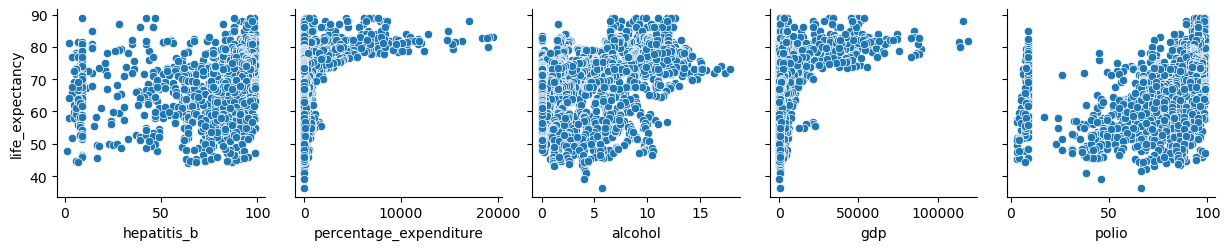

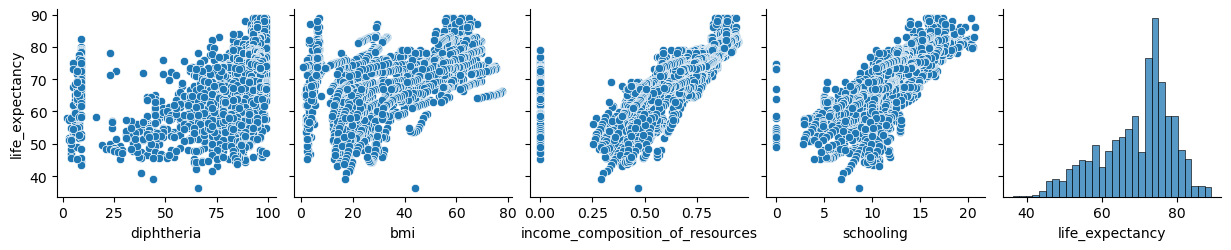

In [167]:
for i in range(0, len(corr_data.index), 5):
    sns.pairplot(data=data_numeric,
    x_vars = corr_data.index[i : i + 5],
    y_vars = ['life_expectancy'])

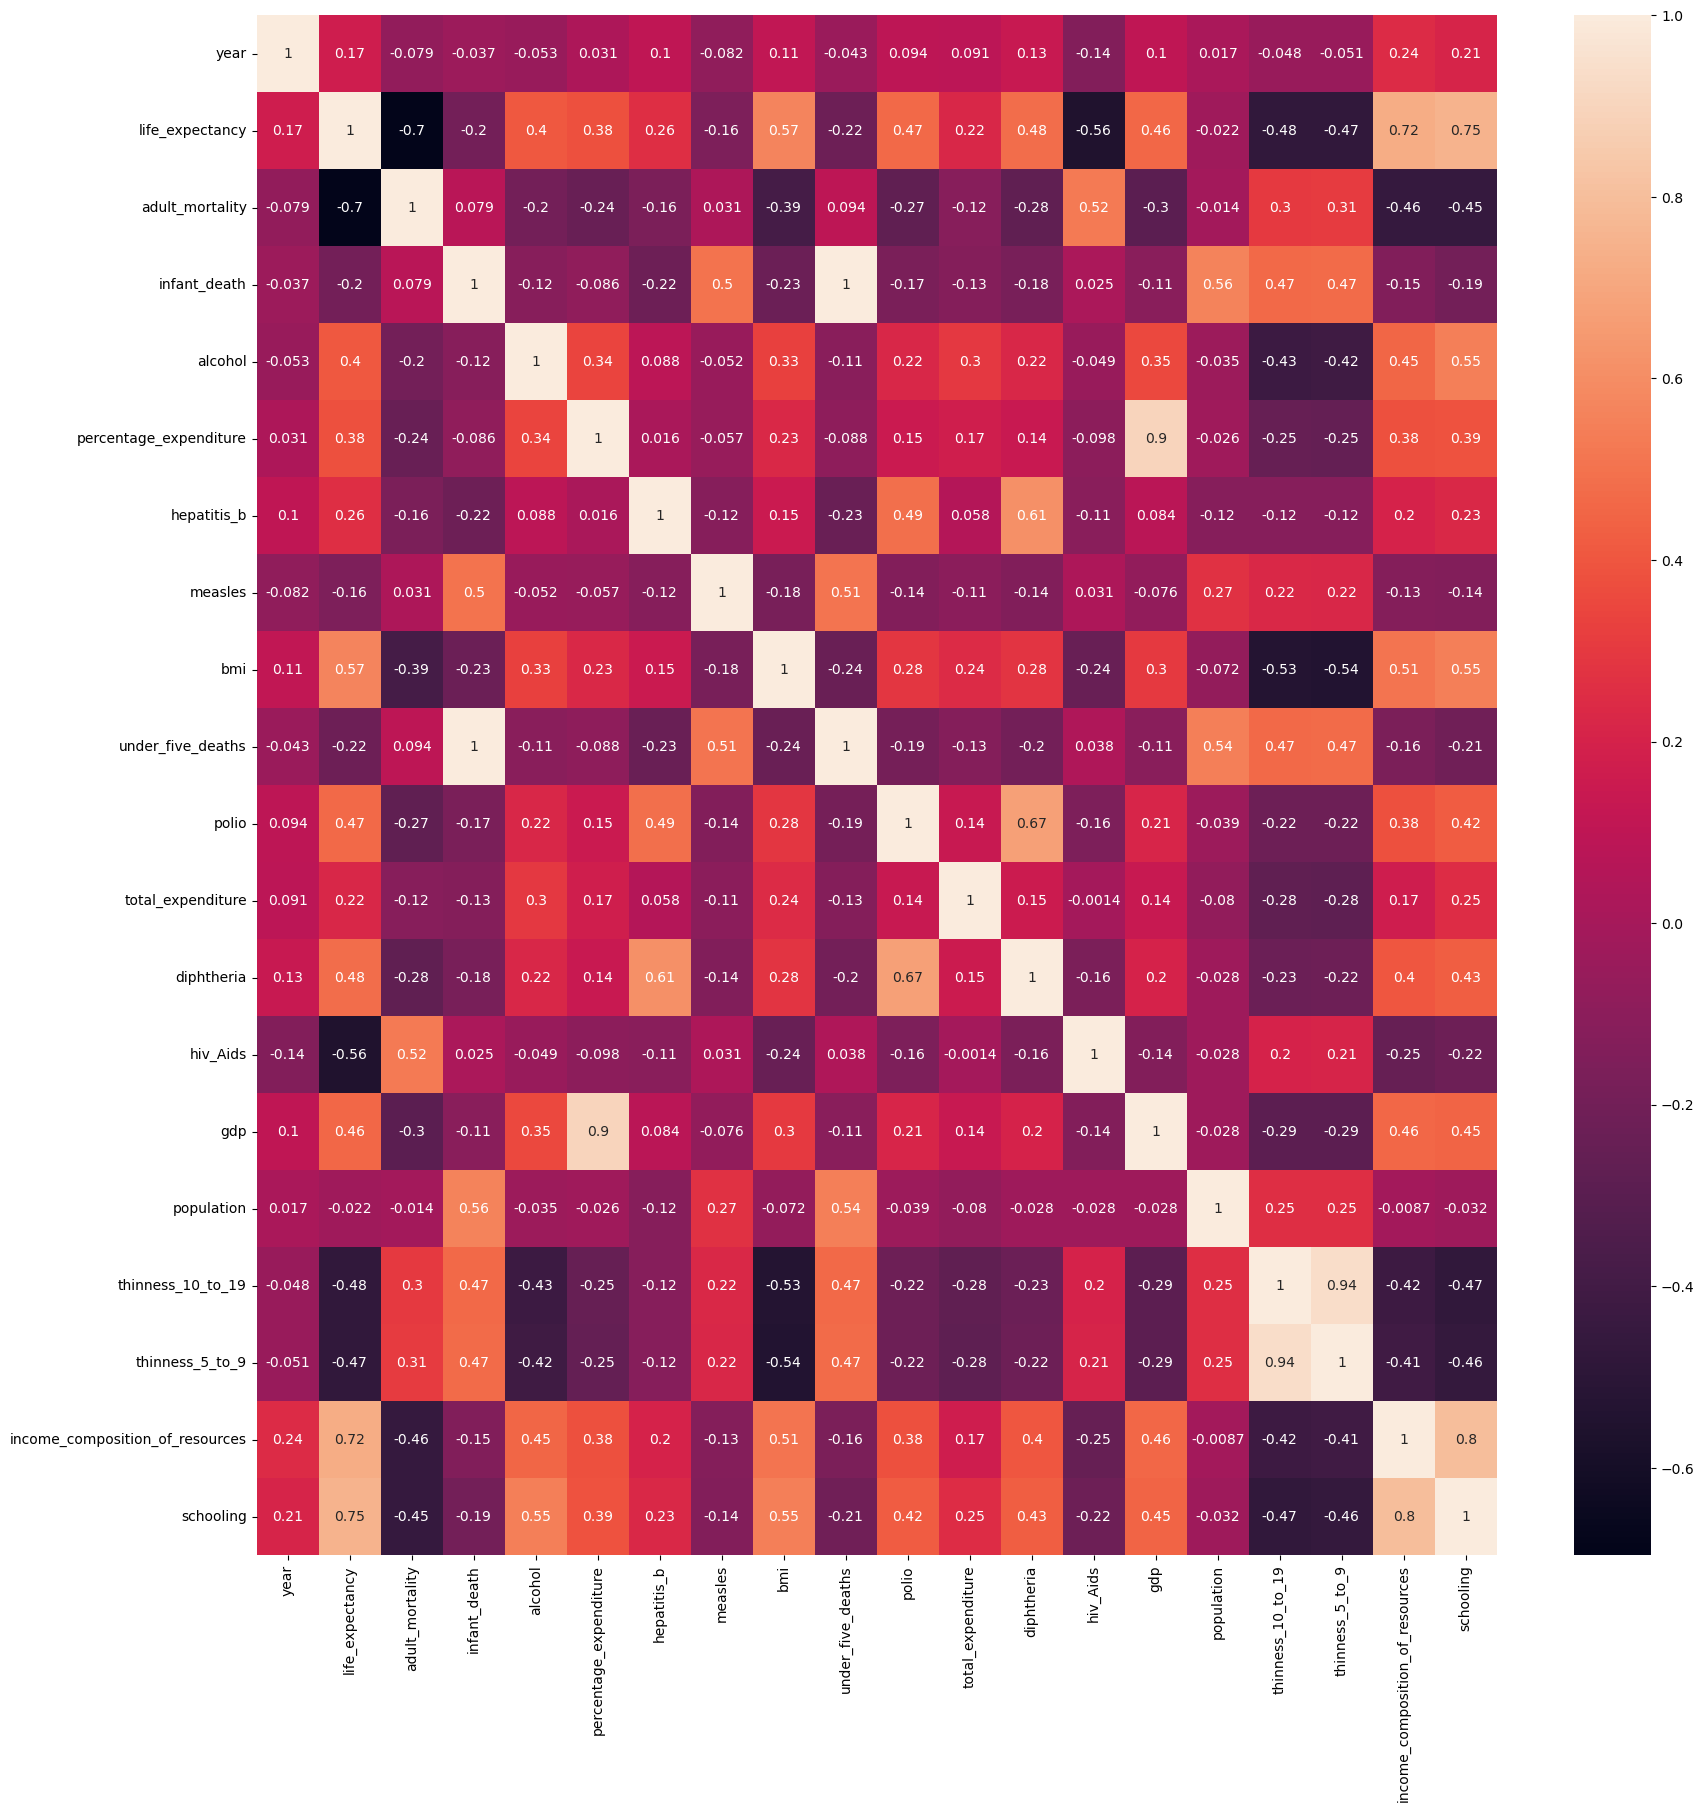

In [168]:
# визуализация
fig=plt.figure(figsize=(20,20))
sns.heatmap(data_numeric.corr(), annot = True) 
plt.show()

4 pairs of features have high correlation

infant_deaths and under-five_deaths (corr=1)<br>
percentage_expenditure and GDP (corr=0.9)<br>
thinness_10-19 years and thinness_5-9 years(corr=0.94)<br>
Income_composition_of_resources and Schooling(corr=0.8)<br>


In [169]:
data_numeric = data_numeric.drop(['thinness_5_to_9','percentage_expenditure','infant_death'],axis=1)

In [170]:
data_numeric.columns

Index(['year', 'life_expectancy', 'adult_mortality', 'alcohol', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv_Aids', 'gdp', 'population', 'thinness_10_to_19',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

In [171]:
corr_data=data_numeric.corr()['life_expectancy'].sort_values()
corr_data

adult_mortality                   -0.696
hiv_Aids                          -0.557
thinness_10_to_19                 -0.477
under_five_deaths                 -0.223
measles                           -0.158
population                        -0.022
year                               0.170
total_expenditure                  0.218
hepatitis_b                        0.257
alcohol                            0.405
gdp                                0.461
polio                              0.466
diphtheria                         0.479
bmi                                0.568
income_composition_of_resources    0.725
schooling                          0.752
life_expectancy                    1.000
Name: life_expectancy, dtype: float64

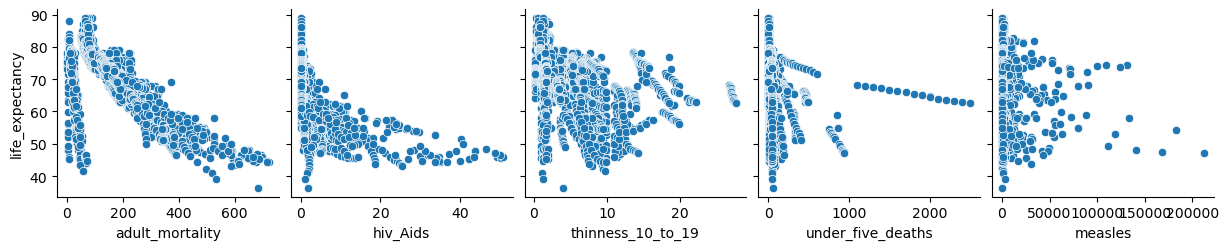

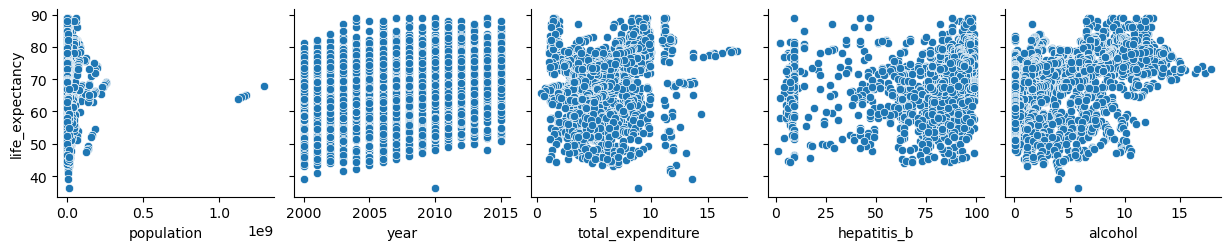

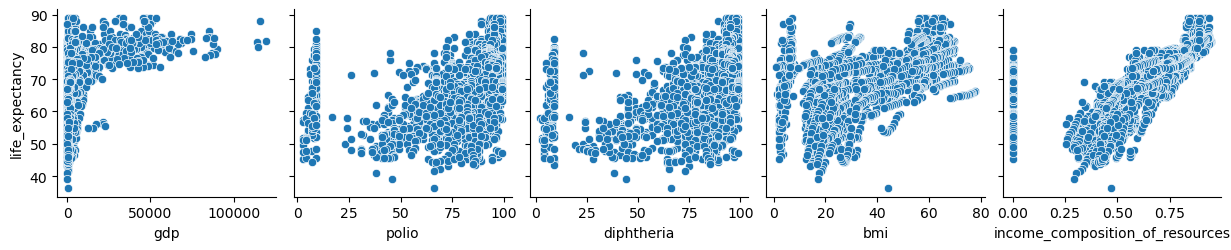

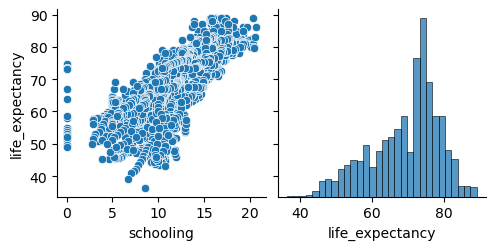

In [172]:
for i in range(0, len(corr_data.index), 5):
    sns.pairplot(data=data_numeric,
                x_vars = corr_data.index[i : i + 5],
                y_vars = ['life_expectancy'])

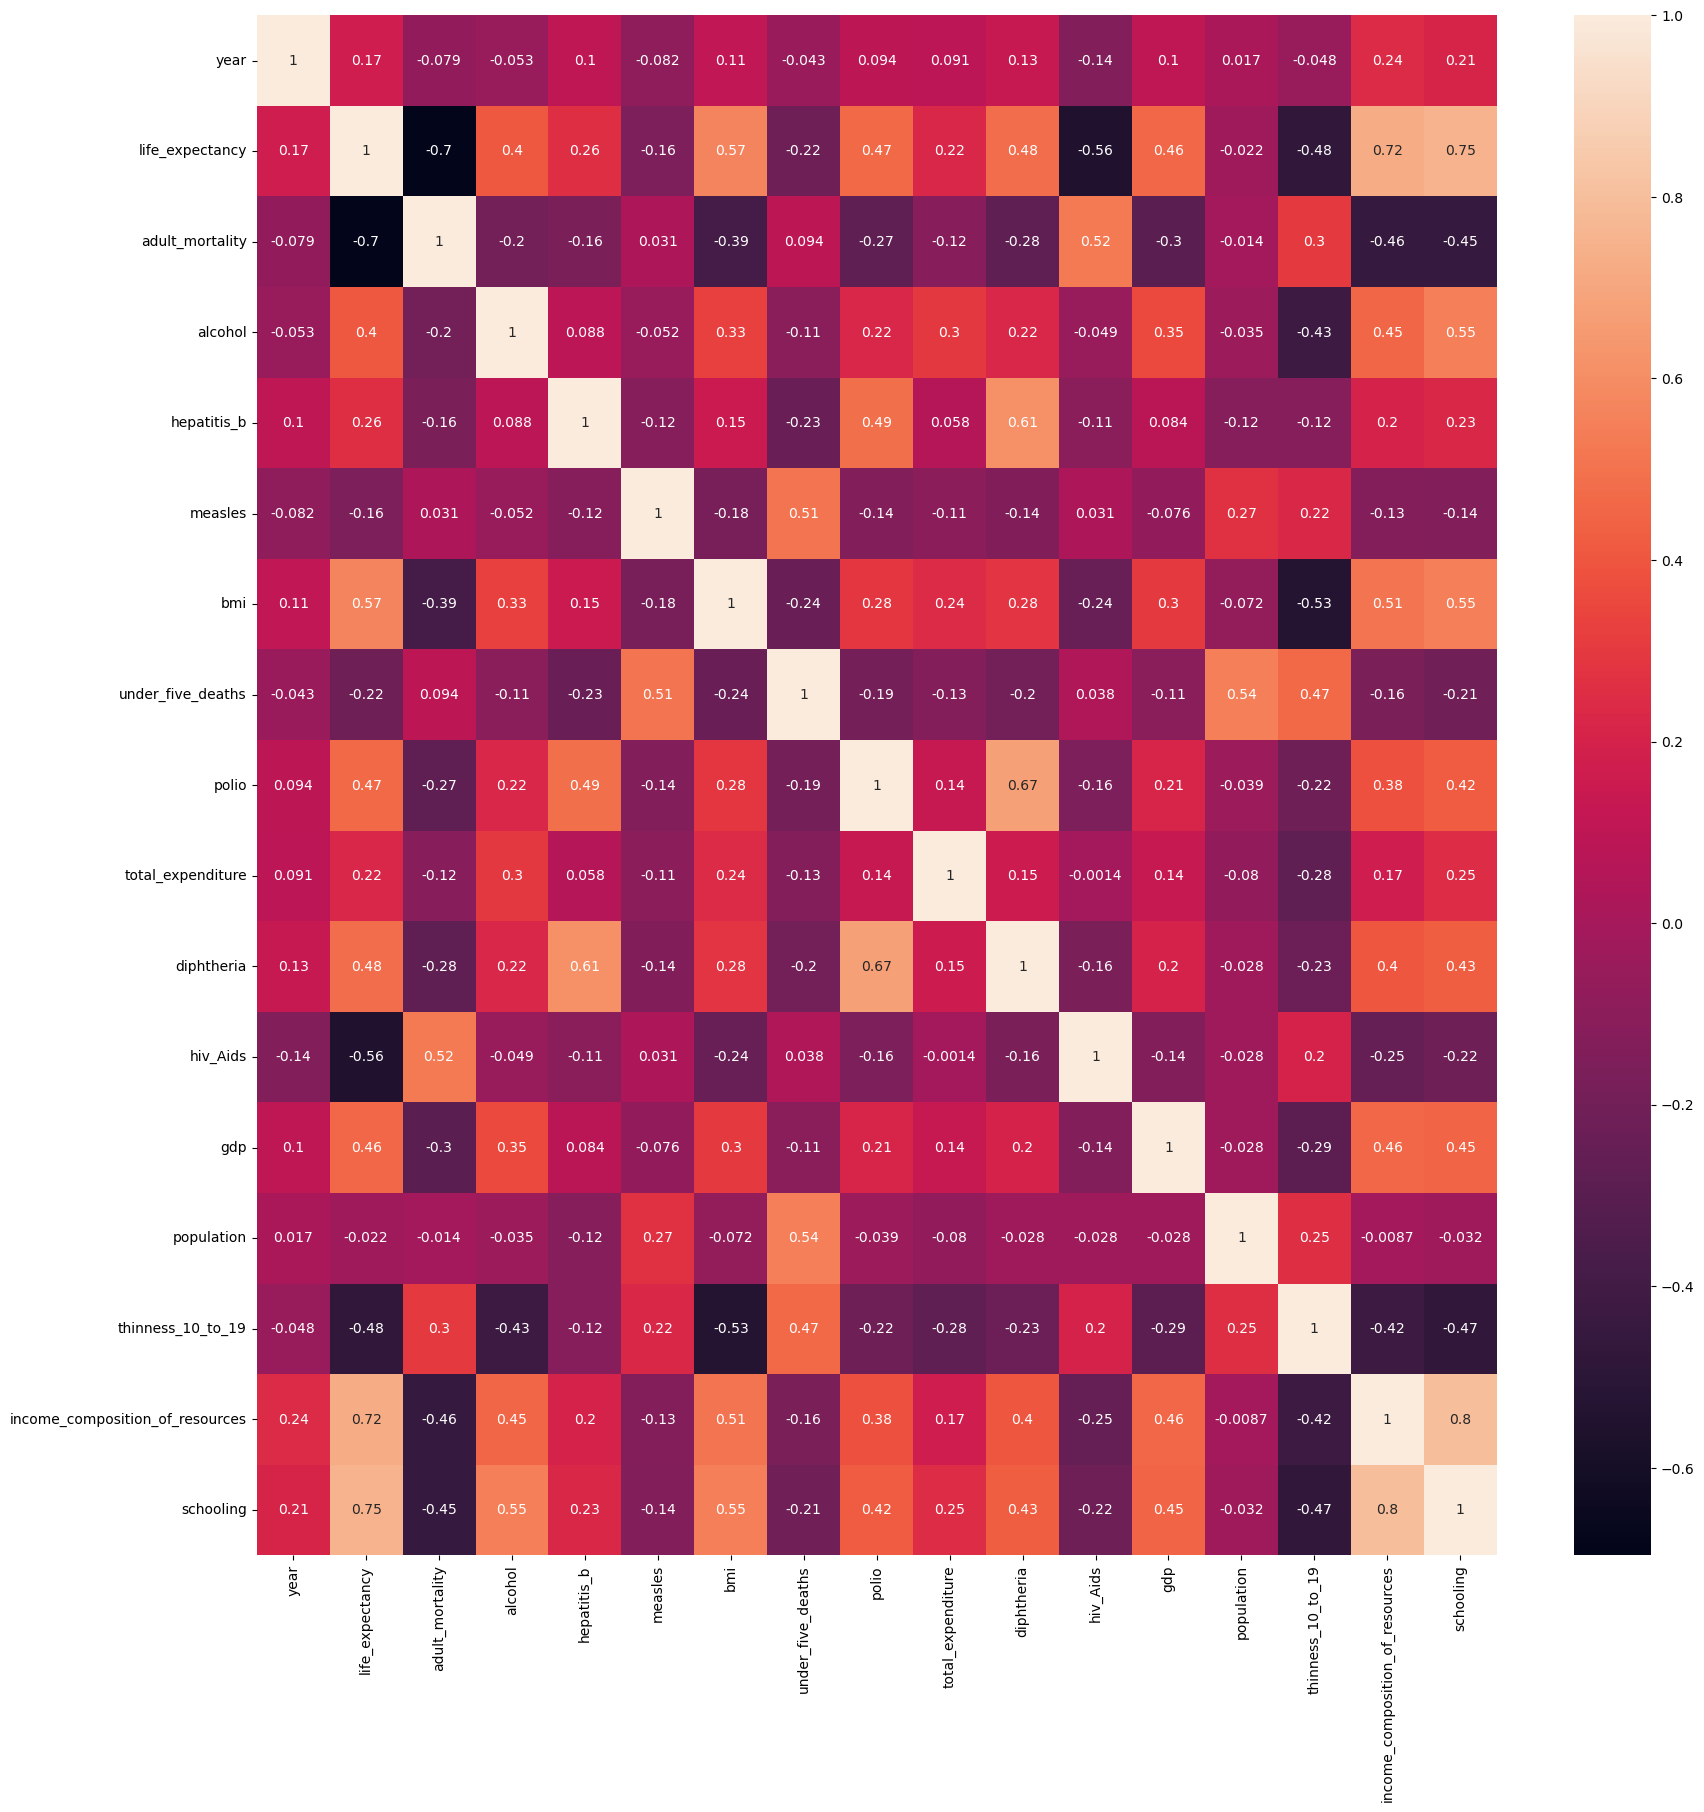

In [173]:
# визуализация
fig=plt.figure(figsize=(20,20))
sns.heatmap(data_numeric.corr(), annot = True) 
plt.show()

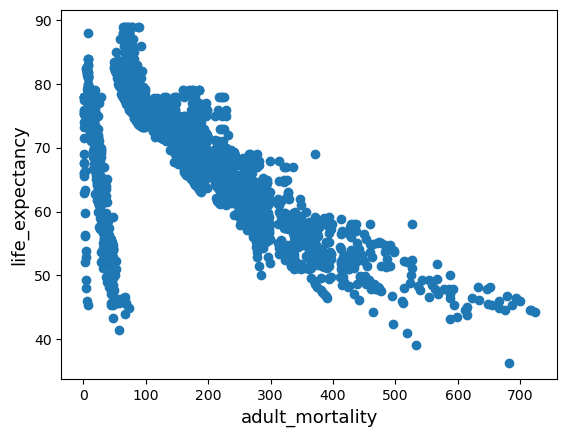

In [174]:
# Removing Outliers
# Schooling and Income_composition_of_resources are highly positive correlated
# Adult_Mortality is highly negatively correlated

fig, ax = plt.subplots()
ax.scatter(x = data_numeric['adult_mortality'], y = data_numeric['life_expectancy'])
plt.ylabel('life_expectancy', fontsize=13)
plt.xlabel('adult_mortality', fontsize=13)
plt.show()

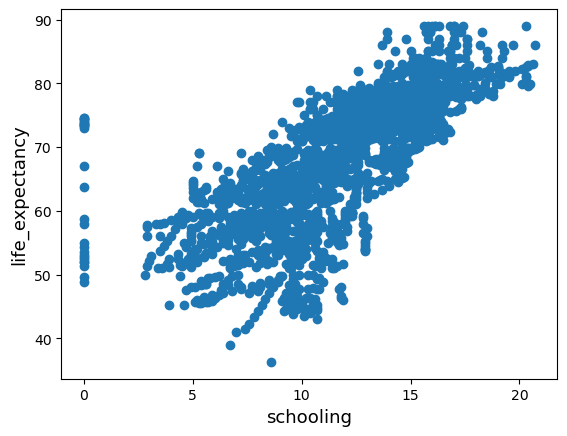

In [175]:
fig, ax = plt.subplots()
ax.scatter(x = data_numeric['schooling'], y = data_numeric['life_expectancy'])
plt.ylabel('life_expectancy', fontsize=13)
plt.xlabel('schooling', fontsize=13)
plt.show()

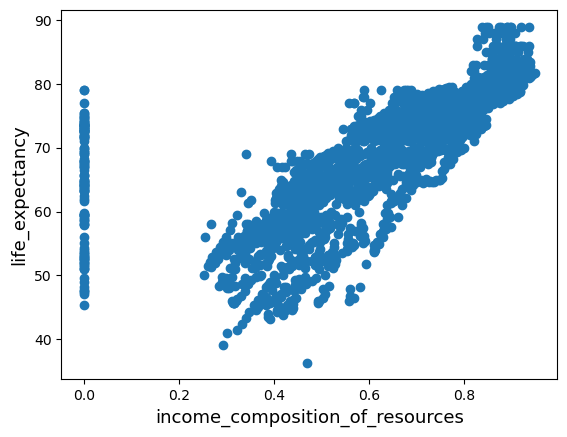

In [176]:
fig, ax = plt.subplots()
ax.scatter(x = data_numeric['income_composition_of_resources'], y = data_numeric['life_expectancy'])
plt.ylabel('life_expectancy', fontsize=13)
plt.xlabel('income_composition_of_resources', fontsize=13)
plt.show()

In [177]:
data_numeric = data_numeric.drop(data_numeric[data_numeric['income_composition_of_resources']<0.2].index)
data_numeric = data_numeric.drop(data_numeric[data_numeric['schooling']<1].index)
data_numeric = data_numeric.drop(data_numeric[data_numeric['adult_mortality']<70].index)



In [181]:
data = data_numeric.fillna(data_numeric.median())
data


,year,life_expectancy,adult_mortality,alcohol,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_Aids,gdp,population,thinness_10_to_19,income_composition_of_resources,schooling
0,2015,65.0,263.0,0.01,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259,3.374e+07,17.2,0.479,10.1
1,2014,59.9,271.0,0.01,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.697,3.276e+05,17.5,0.476,10.0
2,2013,59.9,268.0,0.01,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.745,3.173e+07,17.7,0.470,9.9
3,2012,59.5,272.0,0.01,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959,3.697e+06,17.9,0.463,9.8
4,2011,59.2,275.0,0.01,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537,2.979e+06,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,4.36,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.367,1.278e+07,9.4,0.407,9.2
2934,2003,44.5,715.0,4.06,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351,1.263e+07,9.8,0.418,9.5
2935,2002,44.8,73.0,4.43,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348,1.255e+05,1.2,0.427,10.0
2936,2001,45.3,686.0,1.72,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587,1.237e+07,1.6,0.427,9.8


In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144 entries, 0 to 2937
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             2144 non-null   int64  
 1   life_expectancy                  2144 non-null   float64
 2   adult_mortality                  2144 non-null   float64
 3   alcohol                          2144 non-null   float64
 4   hepatitis_b                      2144 non-null   float64
 5   measles                          2144 non-null   int64  
 6   bmi                              2144 non-null   float64
 7   under_five_deaths                2144 non-null   int64  
 8   polio                            2144 non-null   float64
 9   total_expenditure                2144 non-null   float64
 10  diphtheria                       2144 non-null   float64
 11  hiv_Aids                         2144 non-null   float64
 12  gdp                 

In [183]:
data_combine = data.join(country, rsuffix='_left').join(status)
data_combine.head()

,year,life_expectancy,adult_mortality,alcohol,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_Aids,gdp,population,thinness_10_to_19,income_composition_of_resources,schooling,country,status
0,2015,65.0,263.0,0.01,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259,3.374e+07,17.2,0.479,10.1,Afghanistan,Developing
1,2014,59.9,271.0,0.01,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.697,3.276e+05,17.5,0.476,10.0,Afghanistan,Developing
2,2013,59.9,268.0,0.01,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.745,3.173e+07,17.7,0.470,9.9,Afghanistan,Developing
3,2012,59.5,272.0,0.01,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959,3.697e+06,17.9,0.463,9.8,Afghanistan,Developing
4,2011,59.2,275.0,0.01,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537,2.979e+06,18.2,0.454,9.5,Afghanistan,Developing


In [184]:
data_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             2144 non-null   int64  
 1   life_expectancy                  2144 non-null   float64
 2   adult_mortality                  2144 non-null   float64
 3   alcohol                          2144 non-null   float64
 4   hepatitis_b                      2144 non-null   float64
 5   measles                          2144 non-null   int64  
 6   bmi                              2144 non-null   float64
 7   under_five_deaths                2144 non-null   int64  
 8   polio                            2144 non-null   float64
 9   total_expenditure                2144 non-null   float64
 10  diphtheria                       2144 non-null   float64
 11  hiv_Aids                         2144 non-null   float64
 12  gdp                 

In [185]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in data_combine:
    if data_combine[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(data_combine[col].unique())) <= 2:
            # Train
            le.fit(data_combine[col])
            # Transform 
            data_combine[col] = le.transform(data_combine[col])
          
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

1 columns were label encoded.


In [186]:
# one-hot encoding of categorical variables
data_combine = pd.get_dummies(data_combine)
print('Features shape: ', data_combine.shape)


Features shape:  (2144, 208)


In [187]:
## Evaluate Algorithms: baseline
# Split-out validation dataset
X = data_combine.drop(['life_expectancy'],axis=1)
y = data['life_expectancy']
X, y

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=13)

In [238]:
# Test options and evaluation metric
num_folds=6
seed=13
scoring='neg_mean_squared_error'
#scoring='r2'

In [239]:
# Algorithms
models=[]
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [240]:
results=[]
names=[]
for name, model in models:
    kf=KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results=cross_val_score(model, X_train, y_train, cv=kf, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"Модель {name}: accuracy-> {round(cv_results.mean(), 2)}, std-> {round(cv_results.std(), 2)}")
    

Модель LR: accuracy-> -50065.26, std-> 111528.74
Модель LASSO: accuracy-> -7.01, std-> 2.12
Модель EN: accuracy-> -6.86, std-> 2.3
Модель KNN: accuracy-> -71.1, std-> 3.33
Модель CART: accuracy-> -6.02, std-> 1.69
Модель SVR: accuracy-> -89.66, std-> 8.53


C:\Users\Iuliia\AppData\Local\Temp\ipykernel_36268\2533408253.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names)


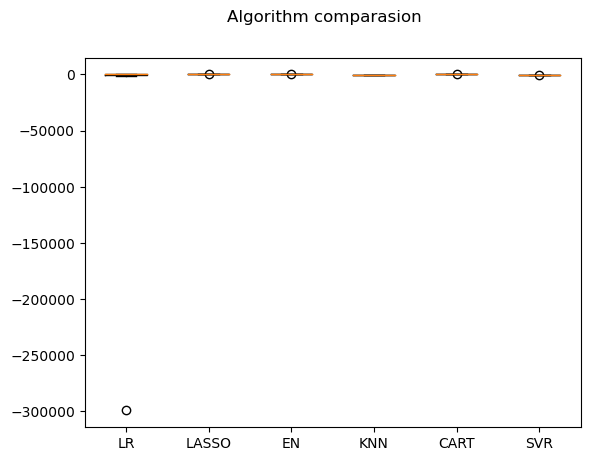

In [241]:
fig=plt.figure()
fig.suptitle('Algorithm comparasion')
ax=fig.add_subplot(111)
ax.set_xticklabels(names)
plt.boxplot(results)
plt.show()

In [242]:
## Evaluate Algorithms: standartization
# Standardize the dataset
pipelines=[]
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()), ('SVR', SVR())])))

results=[]
names=[]
for name, model in pipelines:
    kf=KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results=cross_val_score(model, X_train, y_train, cv=kf, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"Модель {name}: accuracy-> {round(cv_results.mean(), 2)}, std-> {round(cv_results.std(), 2)}")
    


Модель ScaledLR: accuracy-> -6.195691818409373e+24, std-> 1.3611714545391765e+25
Модель ScaledLASSO: accuracy-> -8.8, std-> 1.35
Модель ScaledEN: accuracy-> -11.18, std-> 1.1
Модель ScaledKNN: accuracy-> -6.28, std-> 1.25
Модель ScaledCART: accuracy-> -5.91, std-> 1.64
Модель ScaledSVR: accuracy-> -13.25, std-> 2.19


C:\Users\Iuliia\AppData\Local\Temp\ipykernel_36268\2620265609.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names)


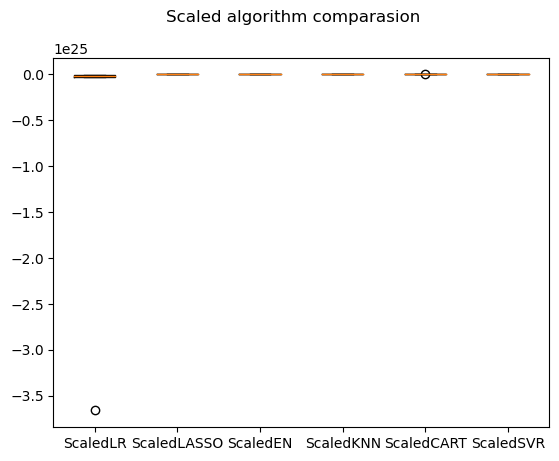

In [243]:
fig=plt.figure()
fig.suptitle('Scaled algorithm comparasion')
ax=fig.add_subplot(111)
ax.set_xticklabels(names)
plt.boxplot(results)
plt.show()

In [244]:
# KNN Algorithm tuning
scaler=StandardScaler().fit(X_train)
scaledX=scaler.transform(X_train)
parameters={'n_neighbors':[1,3,5,7,9,11,13,15,17, 21]}

model=KNeighborsRegressor()
kf=KFold(n_splits=10, random_state=13, shuffle=True)

grid=GridSearchCV(model, parameters, cv=kf, scoring=scoring)
grid_res=grid.fit(scaledX, y_train)
print(f"Лучшая точность {round(grid_res.best_score_, 2)} с параметром {grid_res.best_params_}")

mean_values=grid_res.cv_results_['mean_test_score']
std_values=grid_res.cv_results_['std_test_score']
parameters_values=grid_res.cv_results_['params']

sorted_zip = sorted(zip(mean_values, std_values, parameters_values), key = lambda value : value[0], reverse = True)
for mean, std, parameter in sorted_zip:
    print(f"accuracy-> {round(mean, 3)}, std-> {round(std, 2)} parameter-> {parameter}")

Лучшая точность -4.69 с параметром {'n_neighbors': 3}
accuracy-> -4.693, std-> 1.22 parameter-> {'n_neighbors': 3}
accuracy-> -4.899, std-> 1.15 parameter-> {'n_neighbors': 1}
accuracy-> -5.846, std-> 1.41 parameter-> {'n_neighbors': 5}
accuracy-> -7.139, std-> 1.73 parameter-> {'n_neighbors': 7}
accuracy-> -8.22, std-> 1.96 parameter-> {'n_neighbors': 9}
accuracy-> -8.686, std-> 1.89 parameter-> {'n_neighbors': 11}
accuracy-> -9.039, std-> 1.87 parameter-> {'n_neighbors': 13}
accuracy-> -9.736, std-> 1.98 parameter-> {'n_neighbors': 15}
accuracy-> -10.625, std-> 2.05 parameter-> {'n_neighbors': 17}
accuracy-> -12.582, std-> 2.06 parameter-> {'n_neighbors': 21}


In [245]:
# ensembles

ensembles=[]
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()), ('GBM',GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()), ('ET', ExtraTreesRegressor())])))

results=[]
names=[]
for name, model in ensembles:
    kf=KFold(n_splits=10, random_state=13, shuffle=True)
    cv_results=cross_val_score(model, X_train, y_train, cv=kf, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"Модель {name}: accuracy-> {round(cv_results.mean(), 3)}, std-> {round(cv_results.std(), 2)}")
    

Модель ScaledAB: accuracy-> -8.208, std-> 2.88
Модель ScaledGBM: accuracy-> -4.325, std-> 2.15
Модель ScaledRF: accuracy-> -3.504, std-> 2.26
Модель ScaledET: accuracy-> -2.509, std-> 1.47


C:\Users\Iuliia\AppData\Local\Temp\ipykernel_36268\1157730813.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names)


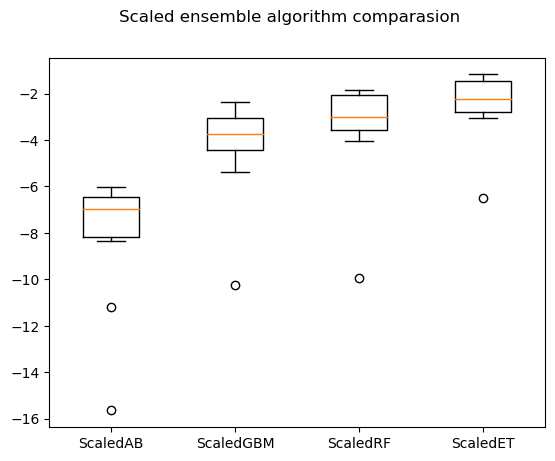

In [246]:
fig=plt.figure()
fig.suptitle('Scaled ensemble algorithm comparasion')
ax=fig.add_subplot(111)
ax.set_xticklabels(names)
plt.boxplot(results)
plt.show()

In [247]:
## finalize
# prepare the model

scaler=StandardScaler().fit(X_train)
scaledX=scaler.transform(X_train)
model=ExtraTreesRegressor()
model.fit(scaledX, y_train)


ExtraTreesRegressor()

In [248]:

scaledX_test=scaler.transform(X_test)
predictions=model.predict(scaledX_test)
mse=mean_squared_error(y_test, predictions)
print(f"MSE-> {round(mse, 3)}")

print(f"determination coeff->", round(r2_score(y_test, predictions), 3))






MSE-> 1.809
determination coeff-> 0.978


In [249]:
mod = sm.OLS(y_train, X_train)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     228.3
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:38:08   Log-Likelihood:                -3241.3
No. Observations:                1715   AIC:                             6895.
Df Residuals:                    1509   BIC:                             8017.
Df Model:                         205                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------